**Interpret** is an open source package from Microsoft that has a module of “glass-box” models which enable explainability. This doesn’t imply a loss in performance as EBMs are shown in a few datasets to perform at par with other boosting methods.
Based on the idea of additive models, this approach changes the training process from training a decision tree on all features to a decision tree with one feature at a time. Multiple trees are constructed per feature with small depth and in boosting fashion. Based on the summation of all its trees, we can estimate the function (f) of the input variable with the output variable. There are some good videos by the authors here . The paper can also be accessed here. Contribution of each feature to a final prediction can be understood by its f . Since EBM is an additive model, each feature contributes to predictions in a modular way that makes it easy to reason about the contribution of each feature to the prediction.
The code architecture is quite simplistic. The below image from the official paper gives a glimpse.


![N|Solid](https://miro.medium.com/max/1400/1*BSLmLXnGlgXLfeWA_F_9BA.png)


Apart from the glass box models, one can also use the usual SHAP, Lime, PDP and sensitivity components of the package. This is also compatible with scikit-learn . This Medium article gives a good example of using this package for SVM and Xgboost. This package also allows you to compile various interactive widgets into a neat dashboard. Many examples are there in their github page. However I found the package still in its early stages and limited in terms of general things for example, model metrics, etc. The visualizations also aren’t as engaging relative to the other packages. The methodology however holds promise with comparable performance.


See [https://medium.com/analytics-vidhya/model-interpretation-with-microsofts-interpret-ml-85aa0ad697ae](https://medium.com/analytics-vidhya/model-interpretation-with-microsofts-interpret-ml-85aa0ad697ae)


# Import libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# Built-in libraries
#
import math
import numpy    as np
import pandas   as pd


# Visualization libraries
#
import matplotlib.pyplot as plt
import seaborn           as sns

# Sklearn libraries
#
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer

# Parameters

In [3]:
test_size = 0.1

# Import data

**Breast cancer wisconsin (diagnostic) dataset**
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign




This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.


**References**

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Loading data

In [4]:
# Load Breast Cancer dataset
data = load_breast_cancer() 

# Create DataFrame
#
df   = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column
#
df['class'] = data.target


# Show DataFrame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## Pre-processing data

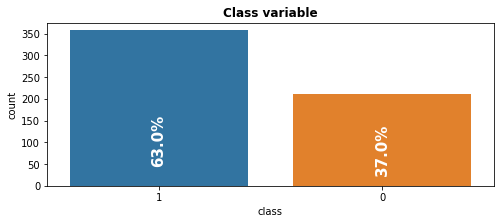

In [5]:
fig = plt.figure(figsize=(8,3))
ax  = sns.countplot(df['class'], order = df['class'].value_counts().index)

#Create annotate
for i in ax.patches:
    ax.text(x        = i.get_x() + i.get_width()/2, 
            y        = i.get_height()/7, 
            s        = f"{np.round(i.get_height()/len(df)*100)}%", 
            ha       = 'center', 
            size     = 15, 
            weight   = 'bold', 
            rotation = 90, 
            color    = 'white');
    

plt.title("Class variable", size=12, weight='bold');

### Training/Testing sets

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=42) 

# Explainable Boosting Machines

In [7]:
%%capture
! pip install interpret

In [8]:
# Explainability libraries
#
from interpret.perf     import ROC
from interpret          import show
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.data     import ClassHistogram

## create EBM model

In [9]:
############## create EBM model #############
ebm = ExplainableBoostingClassifier()
ebm.fit(trainX, trainY)

ExplainableBoostingClassifier(binning='quantile', early_stopping_rounds=50,
                              early_stopping_tolerance=0.0001,
                              feature_names=['mean radius', 'mean texture',
                                             'mean perimeter', 'mean area',
                                             'mean smoothness',
                                             'mean compactness',
                                             'mean concavity',
                                             'mean concave points',
                                             'mean symmetry',
                                             'mean fractal dimension',
                                             'radius error', 'texture error',
                                             'perimeter error', 'area error',
                                             'smoothn...
                                             'continuous', 'continuous',
                              

## Explainability/Visualization

### Generate EDA visuals 

In [10]:
# Generate EDA visuals
# 
hist = ClassHistogram().explain_data(trainX, trainY, name = 'Train Data')
show(hist)

###Prediction with EBM

We will use ROC curve to explain the prediction quality of EBM

In [11]:
ebm_perf = ROC(ebm.predict_proba).explain_perf(testX, testY, name='EBM')
show(ebm_perf)

### Generate global explanability visuals


In [12]:
# Generate global explanability visuals
#
global_exp = ebm.explain_global()
show(global_exp)

### Generate local explanability visuals


In [13]:
# Generate local explanability visuals
#
ebm_local = ebm.explain_local(testX, testY)
show(ebm_local)

### Create Dashboard

In [14]:
# # Package it all in one Dashboard , see image below
# show([hist, ebm_local, ebm_perf, global_exp], share_tables=True)